In [2]:
import numpy as np
x = np.array(12)
x

array(12)

In [5]:
x.ndim

0

In [6]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [9]:
x.ndim

1

In [10]:
!pip install matplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.9/278.9 kB 2.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.0 MB/s eta

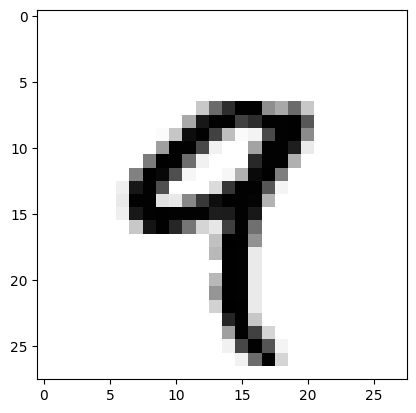

In [92]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [93]:
train_labels[4]

9

In [94]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [95]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [96]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

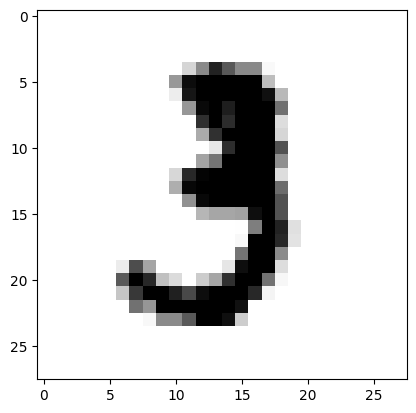

In [97]:
digit = my_slice[0]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

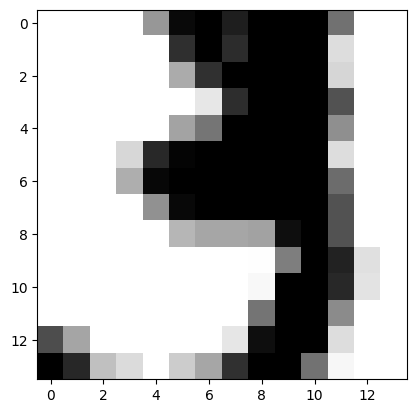

In [98]:
digit = my_slice[0][7:-7, 7:-7]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

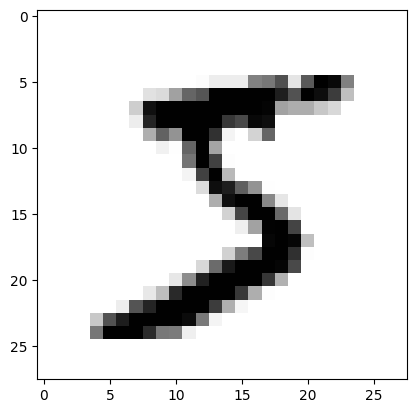

In [99]:
batch = train_images[:128]

plt.imshow(batch[0], cmap=plt.cm.binary)
plt.show()

In [100]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    
    return x

In [101]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)

print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [102]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)

print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.89 s


In [103]:
x.shape

(20, 100)

In [104]:
# Broadcasting

x = np.random.random((32, 10))
y = np.random.random((10,))

y.shape

(10,)

In [105]:
y = np.expand_dims(y, axis=0)

y.shape

(1, 10)

In [106]:
y = np.concatenate([y] * 32, axis=0)

y.shape

(32, 10)

In [107]:
y

array([[0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.82762768, 0.37114613, 0.85100462,
        0.29015402, 0.32705912, 0.74612836, 0.75063872, 0.59398416],
       [0.43975588, 0.69011725, 0.8276276